In [1]:
import sys
sys.path.append('../../src')

In [2]:
from data_loading import *
import matplotlib.pyplot as plt
import numpy as np

## Number of accidents per years

In [3]:
year = 2018
data_2018 = YearLoader(year)

/home/gautier/anaconda3/envs/ada/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [4]:
df_2018_caracteristics = data_2018.get_dataframe("characteristics")

In [5]:
df_2018_caracteristics.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201800000001,18,1,24,1505,1,1,4,1.0,1.0,5,route des Ansereuilles,M,5055737.0,294992.0,590
1,201800000002,18,2,12,1015,1,2,7,7.0,7.0,11,Place du général de Gaul,M,5052936.0,293151.0,590
2,201800000003,18,3,4,1135,1,2,3,1.0,7.0,477,Rue nationale,M,5051243.0,291714.0,590
3,201800000004,18,5,5,1735,1,2,1,7.0,3.0,52,30 rue Jules Guesde,M,5051974.0,289123.0,590
4,201800000005,18,6,26,1605,1,2,1,1.0,3.0,477,72 rue Victor Hugo,M,5051607.0,290605.0,590


In [6]:
all_accident_ids = df_2018_caracteristics["Num_Acc"].unique()

In [7]:
print("Number of accidents in {}: {}".format(year, len(all_accident_ids)))

Number of accidents in 2018: 57783


In [8]:
def get_number_accidents_per_years(min_year, max_year):
    """
    Function that get the number of accidents per year from
    min_year to max_year.
    
    Parameters
    ----------
    min_year : int
        First year to consider
    max_year : int
        Last year to consider
    
    Returns
    -------
    DataFrame
        DataFrame containing the result
    
    """
    accidents_per_years = {}
    for year in range(min_year, max_year+1):
        data_year = YearLoader(year)
        df_year_caracteristics = data_year.get_dataframe("characteristics")
        all_accident_ids = df_year_caracteristics["Num_Acc"].unique()
        num_accidents = len(all_accident_ids)
        accidents_per_years[str(year)] = num_accidents
        
    df_accidents_per_years = pd.Series(accidents_per_years)
    return df_accidents_per_years      

In [9]:
df_accidents_per_year = get_number_accidents_per_years(2008, 2018)

/home/gautier/anaconda3/envs/ada/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
df_accidents_per_year.head()

2008    76767
2009    74409
2010    69379
2011    66974
2012    62250
dtype: int64

In [11]:
def plot_number_accidents_per_years(df_accidents_per_year):
    plt.figure(figsize=(20,10))
    df_accidents_per_year.plot(kind='bar')
    plt.show()

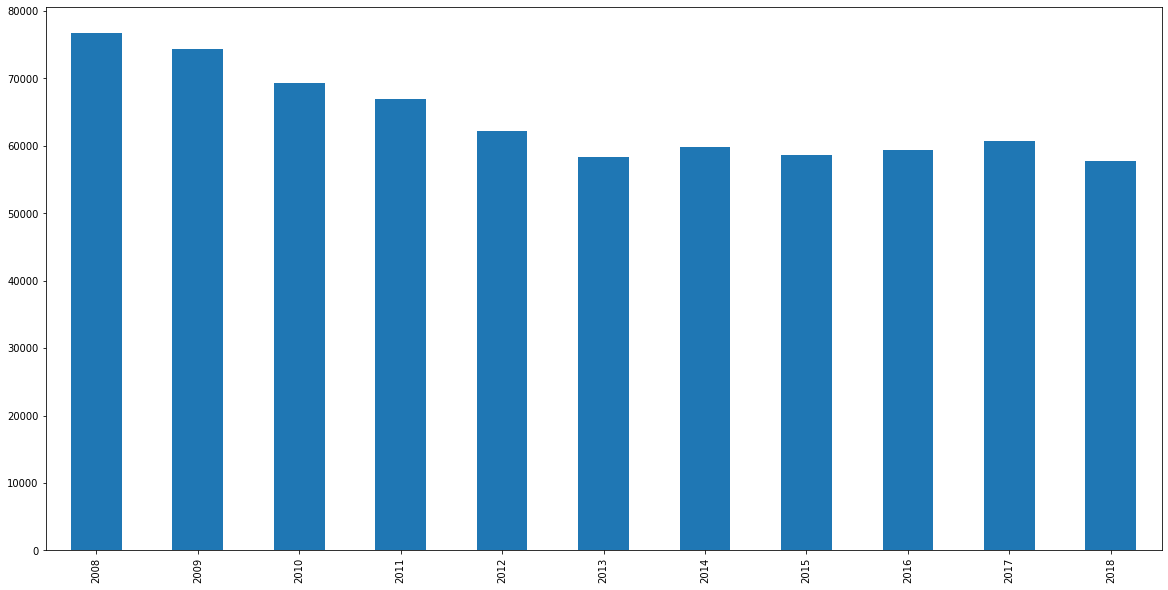

In [12]:
plot_number_accidents_per_years(df_accidents_per_year)

## Number of accidents per months

In [13]:
def get_number_accidents_per_months(data_year):
    """
    Function that get the number of accidents per months for a year
    
    Parameters
    ----------
    data_year : YearLoader
        Data from the year
    
    Returns
    -------
    DataFrame
        DataFrame containing the result
    
    """
    accidents_per_months = {}
    months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]
    df_year_caracteristics = data_year.get_dataframe("characteristics")
    
    for i, month in enumerate(months):
        df_month_caracteristics = df_year_caracteristics[df_year_caracteristics["mois"] == i+1]
        all_months_accident_ids = df_month_caracteristics["Num_Acc"].unique()
        num_accidents_in_month = len(all_months_accident_ids)
        accidents_per_months[month] = num_accidents_in_month

    df_accidents_per_months = pd.Series(accidents_per_months)
    
    return df_accidents_per_months

In [14]:
def plot_number_accidents_per_months(df_accidents_per_months):
    plt.figure(figsize=(20,10))
    df_accidents_per_months.plot(kind='bar')
    plt.show()

In [15]:
df_accidents_per_months_2018 = get_number_accidents_per_months(data_2018)

In [16]:
df_accidents_per_months_2018.head()

Jan    4350
Feb    3458
Mar    4152
Apr    4833
May    5055
dtype: int64

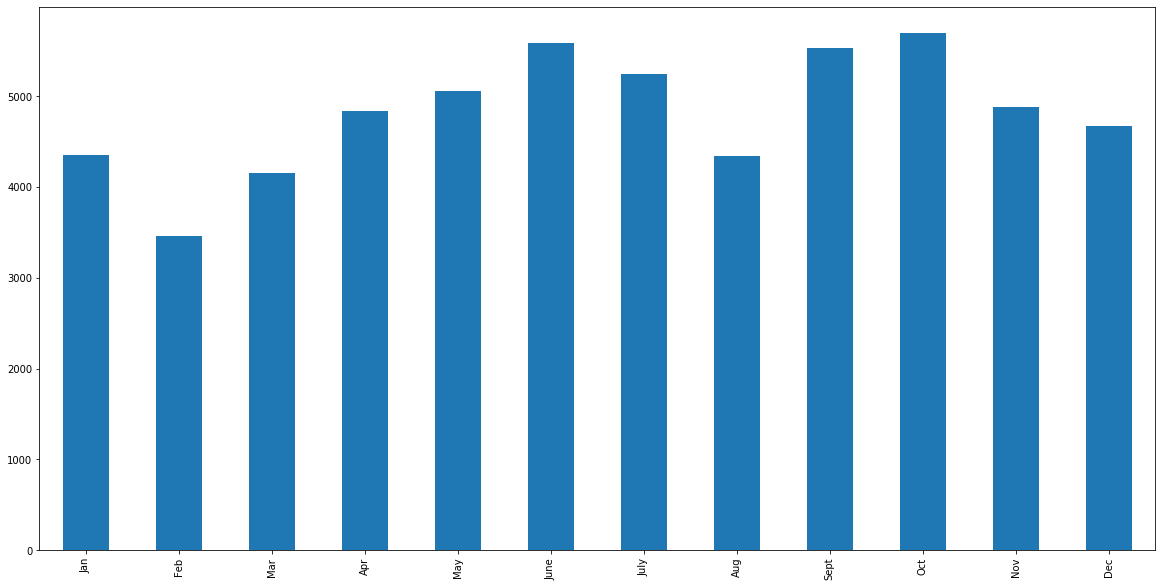

In [17]:
plot_number_accidents_per_months(df_accidents_per_months_2018)

## Number of accidents per months for all years

In [18]:
def get_number_accidents_per_months_all_years(min_year, max_year):
    """
    Function that get the number of accidents per months from
    min_year to max_year.
    
    Parameters
    ----------
    min_year : int
        First year to consider
    max_year : int
        Last year to consider
    
    Returns
    -------
    DataFrame
        DataFrame containing the result
    
    """
    all_years_accidents_per_months = {}
    for year in range(min_year, max_year+1):
        data_year = YearLoader(year)
        accidents_per_months = get_number_accidents_per_months(data_year)
        all_years_accidents_per_months[str(year)] = accidents_per_months
    
    df_all_years_accidents_per_months = pd.DataFrame(all_years_accidents_per_months)
    return df_all_years_accidents_per_months

In [19]:
df_all_accidents_per_months = get_number_accidents_per_months_all_years(2008, 2018)

/home/gautier/anaconda3/envs/ada/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
df_all_accidents_per_months.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Jan,6151,5395,4711,5062,5057,4396,4783,4437,4802,4589,4350
Feb,5842,4824,4467,4518,3983,3891,4224,3900,4101,4088,3458
Mar,6049,5885,5503,5520,5201,4045,4773,4453,4599,5100,4152
Apr,5927,6119,6019,5892,4572,4553,4967,4829,4430,5112,4833
May,6517,6638,6087,6282,5340,4633,5113,4917,5139,5266,5055


In [21]:
def plot_all_years_accidents_per_months(all_accidents_per_months):
    width = 0.05 
    months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]
    ind = np.arange(12)

    all_accidents_per_months.plot(kind='bar', figsize=(20,10))

    plt.ylabel('Number of accidents')
    plt.title('Number of accidents per months between 2008 and 2018')

    plt.xticks(ind, months)
    plt.legend(loc='best')
    plt.show()

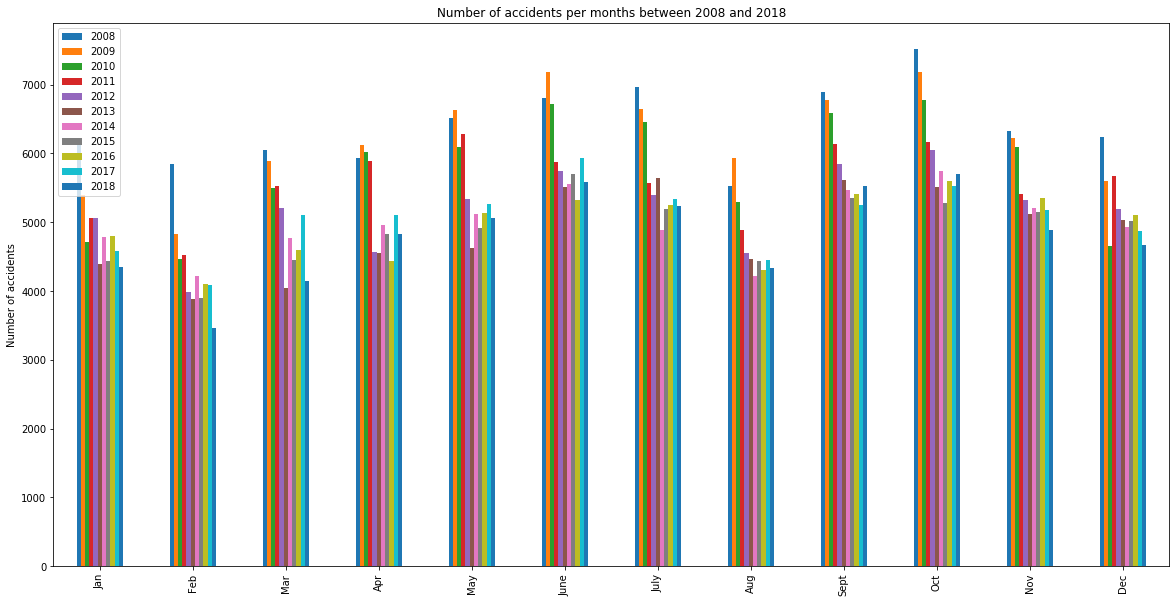

In [22]:
plot_all_years_accidents_per_months(df_all_accidents_per_months)

## Gravity of accidents

In [23]:
def get_accidents_gravity(data_year):
    """
    Function that get the statistics of the gravity of accidents in a year.
    
    Parameters
    ----------
    data_year : YearLoader
        Data from the year
    
    Returns
    -------
    DataFrame
        DataFrame containing the result
    
    """
    gravity_mapping = ["Unscathed", "Dead", "Injured", "Slight injured" ]

    df_year_caracteristics = data_year.get_dataframe("passengers")
    df_accidents_gravity = df_year_caracteristics.groupby("grav")["grav"].count()
    
    return df_accidents_gravity  

In [24]:
def plot_accidents_gravity(df_accidents_gravity):
    gravity_mapping = ["Unscathed", "Dead", "Injured", "Slight injured" ]
    ind = [i for i in range(4)]
    
    df_accidents_gravity.plot(kind='bar', figsize=(20,10))
    plt.xticks(ind, gravity_mapping, rotation=45)
    plt.show()

In [25]:
df_accidents_gravity = get_accidents_gravity(data_2018)

In [26]:
df_accidents_gravity

grav
1    54248
2     3392
3    22169
4    50360
Name: grav, dtype: int64

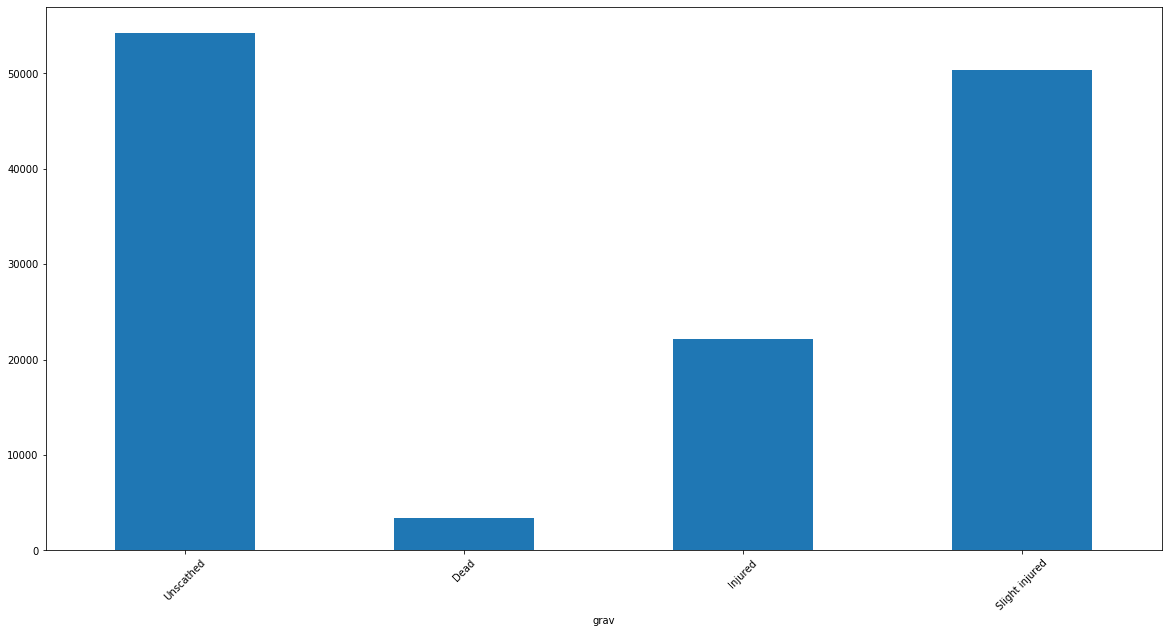

In [27]:
plot_accidents_gravity(df_accidents_gravity)

## Envolution of accidents gravity over years

In [28]:
def get_accidents_gravity_all_years(min_year, max_year):
    """
    Function that get the statistics of the gravity of accidents
    between min_year and max_year.
    
    Parameters
    ----------
    min_year : int
        First year to consider
    max_year : int
        Last year to consider
    
    Returns
    -------
    DataFrame
        DataFrame containing the result
    
    """
    all_years_accidents_gravity = {}
    for year in range(min_year, max_year+1):
        data_year = YearLoader(year)
        df_accidents_gravity = get_accidents_gravity(data_year)
        all_years_accidents_gravity[str(year)] = df_accidents_gravity
    
    df_all_years_accidents_gravity = pd.DataFrame(all_years_accidents_gravity)
    return df_all_years_accidents_gravity

In [29]:
df_all_years_accidents_gravity = get_accidents_gravity_all_years(2008, 2018)

In [30]:
def plot_all_years_accidents_gravity(all_years_accidents_gravity):
    width = 0.05 
    gravity_mapping = ["Unscathed", "Dead", "Injured", "Slightly injured" ]
    ind = np.arange(4)

    all_years_accidents_gravity.plot(kind='bar', figsize=(20,10))

    plt.ylabel('Number of accidents')
    plt.xlabel('Gravity of accidents')
    plt.title('Gravity of accidents between 2008 and 2018')

    plt.xticks(ind, gravity_mapping, rotation=45)
    plt.legend(loc='best')
    plt.show()

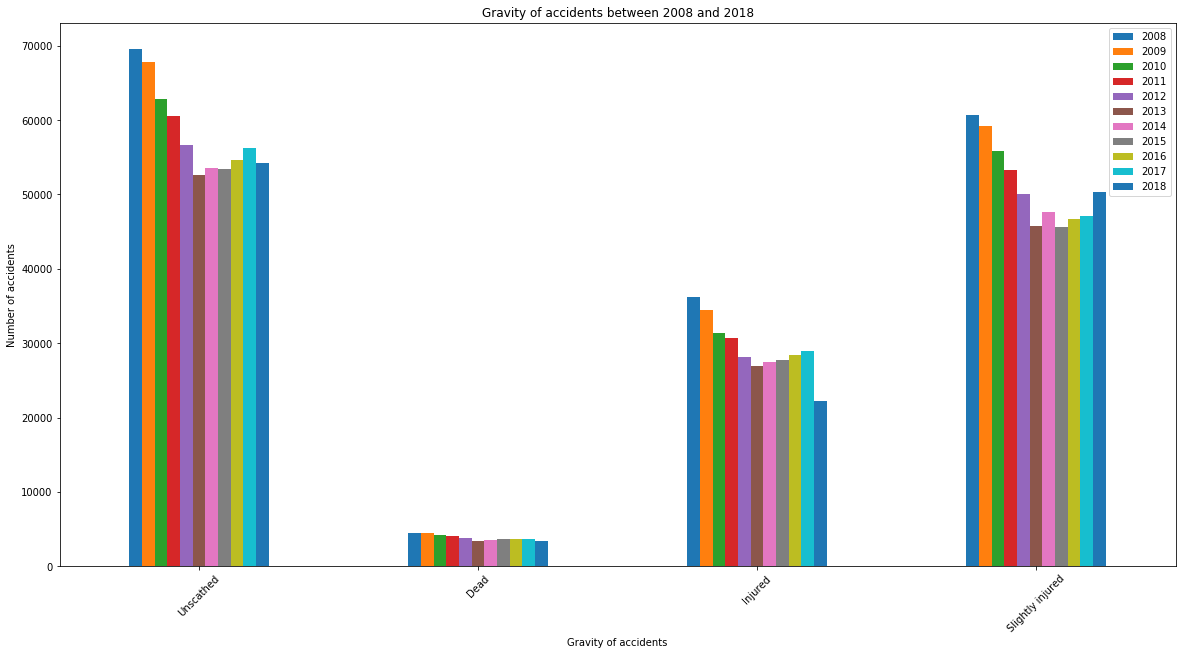

In [31]:
plot_all_years_accidents_gravity(df_all_years_accidents_gravity)

## Number of people involved in an accident

In [32]:
def get_number_people_per_accidents(data_year):
    """
    Function that get the of the number of people
    involved per accidents in a year.
    
    Parameters
    ----------
    data_year : YearLoader
        Data from the year
    
    Returns
    -------
    DataFrame
        DataFrame containing the result
    
    """
    
    df_year_caracteristics = data_year.get_dataframe("passengers")
    df_people_per_accidents = df_year_caracteristics.groupby("Num_Acc")["Num_Acc"].count()
    
    return df_people_per_accidents
    

In [33]:
df_people_per_accidents_2018 = get_number_people_per_accidents(data_2018)

In [34]:
df_people_per_accidents_2018.describe()

count    57783.000000
mean         2.252721
std          1.265973
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         51.000000
Name: Num_Acc, dtype: float64

In [35]:
def plot_number_people_per_accidents(people_per_accidents, multiple_years=False, year=2018):
    
    people_per_accidents.hist(bins=200, figsize=(20,10))
    
    plt.ylabel('Number of people per accidents')
    plt.xlabel('Frequency')
    
    if multiple_years:
        plt.title('Histogram of the number of people per accidents between 2008 and 2018')
    else:
        plt.title('Histogram of the number of people per accidents in {}'.format(year))
    
    plt.show()

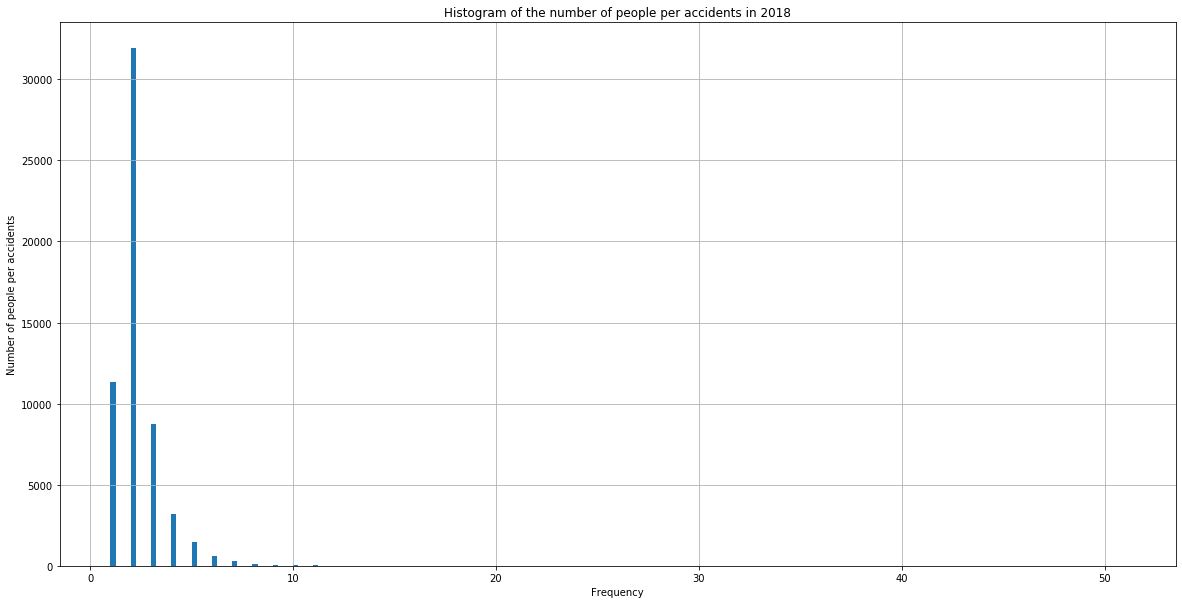

In [36]:
plot_number_people_per_accidents(df_people_per_accidents_2018, year=2018)

In [37]:
def get_number_people_per_accidents_all_years(min_year, max_year):
    """
    Function that get the number of people involved per accidents 
    between min_year and max_year.
    
    Parameters
    ----------
    min_year : int
        First year to consider
    max_year : int
        Last year to consider
    
    Returns
    -------
    DataFrame
        DataFrame containing the result
    
    """
    data_year = YearLoader(min_year)
    df_people_per_accidents_all = get_number_people_per_accidents(data_year)
    
    for year in range(min_year+1, max_year+1):
        data_year = YearLoader(year)
        df_people_per_accidents_year = get_number_people_per_accidents(data_year)
        pd.concat([df_people_per_accidents_all, df_people_per_accidents_year], ignore_index=True)
    
    return df_people_per_accidents_all

In [38]:
df_people_per_accidents_all = get_number_people_per_accidents_all_years(2008, 2018)

In [39]:
df_people_per_accidents_all.describe()

count    76767.000000
mean         2.226999
std          1.182808
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         58.000000
Name: Num_Acc, dtype: float64

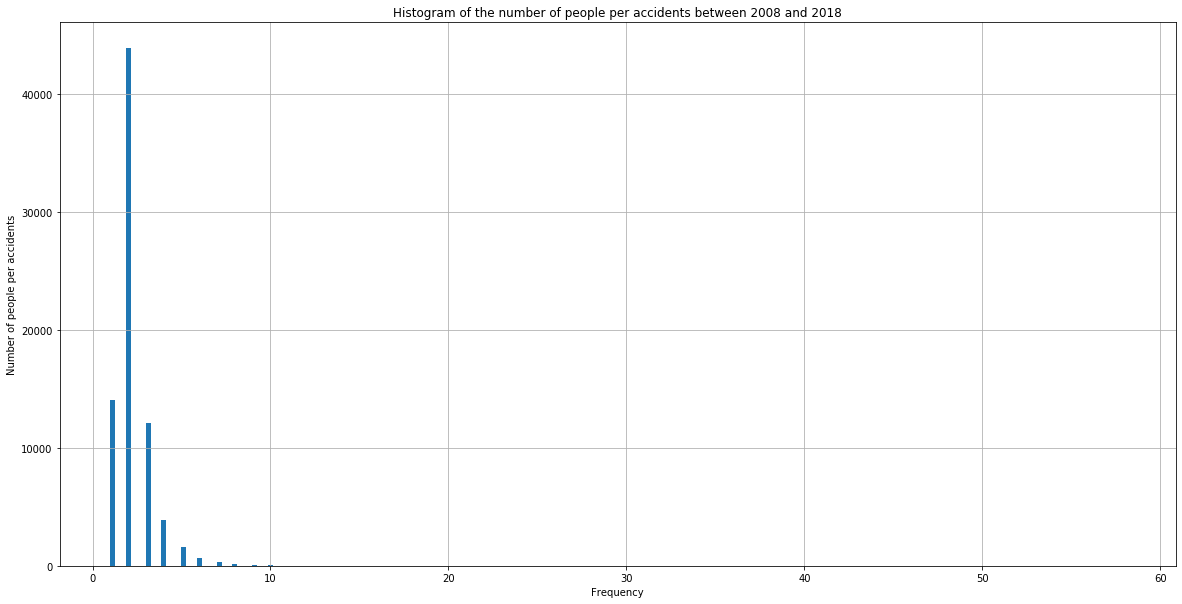

In [40]:
 plot_number_people_per_accidents(df_people_per_accidents_all, multiple_years=True)